<a href="https://colab.research.google.com/github/Farzan-Alimadadi/aircraft-engine-ttf-prediction/blob/main/Big_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Block Will Set up Apache Spark in Google Colab for distributed processing (this is important for our big data component)

# Install Java and Spark in Colab
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz
!tar xf spark-3.1.1-bin-hadoop2.7.tgz
!pip install -q findspark

# Set environment variables for Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

# Initialize Spark
import findspark
findspark.init()

# Start Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark


In [ ]:
# This Block Will Mount Google Drive to access the dataset (this will allow me and my teammate to access and work on the same files collaboratively)

from google.colab import drive
drive.mount('/content/drive')

# Define the path to the dataset (assuming it's saved in a shared folder in your Google Drive)
data_folder = '/content/drive/My Drive/CMAPSSData/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This Block Will Load All The Training, Test, and RUL Datasets for FD001 to FD004

# Load training datasets for FD001 to FD004
train_fd001 = spark.read.csv(data_folder + 'train_FD001.txt', header=False, inferSchema=True, sep=' ')
train_fd002 = spark.read.csv(data_folder + 'train_FD002.txt', header=False, inferSchema=True, sep=' ')
train_fd003 = spark.read.csv(data_folder + 'train_FD003.txt', header=False, inferSchema=True, sep=' ')
train_fd004 = spark.read.csv(data_folder + 'train_FD004.txt', header=False, inferSchema=True, sep=' ')

# Drop empty or extra columns for all datasets (if present)
train_fd001 = train_fd001.drop("_c26")
train_fd002 = train_fd002.drop("_c26")
train_fd003 = train_fd003.drop("_c26")
train_fd004 = train_fd004.drop("_c26")

# Assign column names, including an additional column if it exists
columns = ['unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 'operational_setting_3'] + \
          [f'sensor_{i}' for i in range(1, 22)] + ['extra_column']

train_fd001 = train_fd001.toDF(*columns)
train_fd002 = train_fd002.toDF(*columns)
train_fd003 = train_fd003.toDF(*columns)
train_fd004 = train_fd004.toDF(*columns)

# Show the first few rows of each training dataset to verify the loaded data
print("Training Dataset FD001:")
train_fd001.show(5)

print("Training Dataset FD002:")
train_fd002.show(5)

print("Training Dataset FD003:")
train_fd003.show(5)

print("Training Dataset FD004:")
train_fd004.show(5)

# Load test datasets for FD001 to FD004
test_fd001 = spark.read.csv(data_folder + 'test_FD001.txt', header=False, inferSchema=True, sep=' ')
test_fd002 = spark.read.csv(data_folder + 'test_FD002.txt', header=False, inferSchema=True, sep=' ')
test_fd003 = spark.read.csv(data_folder + 'test_FD003.txt', header=False, inferSchema=True, sep=' ')
test_fd004 = spark.read.csv(data_folder + 'test_FD004.txt', header=False, inferSchema=True, sep=' ')

# Drop empty or extra columns for all datasets (if present)
test_fd001 = test_fd001.drop("_c26")
test_fd002 = test_fd002.drop("_c26")
test_fd003 = test_fd003.drop("_c26")
test_fd004 = test_fd004.drop("_c26")

# Assign column names to test datasets
test_fd001 = test_fd001.toDF(*columns)
test_fd002 = test_fd002.toDF(*columns)
test_fd003 = test_fd003.toDF(*columns)
test_fd004 = test_fd004.toDF(*columns)

# Show the first few rows of each test dataset
print("Test Dataset FD001:")
test_fd001.show(5)

print("Test Dataset FD002:")
test_fd002.show(5)

print("Test Dataset FD003:")
test_fd003.show(5)

print("Test Dataset FD004:")
test_fd004.show(5)

# Load RUL files for FD001 to FD004
rul_fd001 = spark.read.csv(data_folder + 'RUL_FD001.txt', header=False, inferSchema=True)
rul_fd002 = spark.read.csv(data_folder + 'RUL_FD002.txt', header=False, inferSchema=True)
rul_fd003 = spark.read.csv(data_folder + 'RUL_FD003.txt', header=False, inferSchema=True)
rul_fd004 = spark.read.csv(data_folder + 'RUL_FD004.txt', header=False, inferSchema=True)

# Rename the RUL column for each RUL DataFrame
rul_fd001 = rul_fd001.withColumnRenamed('_c0', 'RUL')
rul_fd002 = rul_fd002.withColumnRenamed('_c0', 'RUL')
rul_fd003 = rul_fd003.withColumnRenamed('_c0', 'RUL')
rul_fd004 = rul_fd004.withColumnRenamed('_c0', 'RUL')

# Show the first few rows of each RUL file to verify the loaded data
print("RUL Dataset FD001:")
rul_fd001.show(5)

print("RUL Dataset FD002:")
rul_fd002.show(5)

print("RUL Dataset FD003:")
rul_fd003.show(5)

print("RUL Dataset FD004:")
rul_fd004.show(5)


Training Dataset FD001:
+-----------+--------------+---------------------+---------------------+---------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+------------+
|unit_number|time_in_cycles|operational_setting_1|operational_setting_2|operational_setting_3|sensor_1|sensor_2|sensor_3|sensor_4|sensor_5|sensor_6|sensor_7|sensor_8|sensor_9|sensor_10|sensor_11|sensor_12|sensor_13|sensor_14|sensor_15|sensor_16|sensor_17|sensor_18|sensor_19|sensor_20|sensor_21|extra_column|
+-----------+--------------+---------------------+---------------------+---------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+------------+
|          1|             1|              -7.0E-4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#This Block Will Do The Data Preprocessing and Feature Engineering

from pyspark.sql.functions import col, max as max_, when, avg
from pyspark.sql import Window

# A list of datasets for convenience
datasets = ['FD001', 'FD002', 'FD003', 'FD004']
train_dfs = [train_fd001, train_fd002, train_fd003, train_fd004]
test_dfs = [test_fd001, test_fd002, test_fd003, test_fd004]

preprocessed_train_dfs = []
preprocessed_test_dfs = []

for i in range(len(datasets)):
    # Get the current dataset
    train_df = train_dfs[i]
    test_df = test_dfs[i]

    # Window specification to get the maximum cycle per unit (used to identify failures)
    window_spec = Window.partitionBy('unit_number')

    # Add a label column indicating whether the engine failed at this cycle (1) or is censored (0)
    train_df = train_df.withColumn('failure', when(col('time_in_cycles') == max_('time_in_cycles').over(window_spec), 1).otherwise(0))

    # Example feature engineering: calculate a rolling average for sensor_1
    # Rolling window: last 3 cycles (current and previous two cycles)
    rolling_window = Window.partitionBy('unit_number').orderBy('time_in_cycles').rowsBetween(-2, 0)
    train_df = train_df.withColumn('sensor_1_avg', avg(col('sensor_1')).over(rolling_window))

    # Append the preprocessed DataFrame to the list
    preprocessed_train_dfs.append(train_df)
    preprocessed_test_dfs.append(test_df)

    # Show a preview of the preprocessed training dataset
    print(f"Preprocessed Training Dataset for {datasets[i]}:")
    train_df.show(5)

# Now, let's proceed to split the data into training and validation sets

train_splits = []
validation_splits = []

for i in range(len(datasets)):
    # Split the training dataset into 80% training and 20% validation
    train_split, validation_split = preprocessed_train_dfs[i].randomSplit([0.8, 0.2], seed=123)
    train_splits.append(train_split)
    validation_splits.append(validation_split)

    # Show a preview of the split data
    print(f"Training Split for {datasets[i]}:")
    train_split.show(5)
    print(f"Validation Split for {datasets[i]}:")
    validation_split.show(5)


Preprocessed Training Dataset for FD001:
+-----------+--------------+---------------------+---------------------+---------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+------------+-------+------------+
|unit_number|time_in_cycles|operational_setting_1|operational_setting_2|operational_setting_3|sensor_1|sensor_2|sensor_3|sensor_4|sensor_5|sensor_6|sensor_7|sensor_8|sensor_9|sensor_10|sensor_11|sensor_12|sensor_13|sensor_14|sensor_15|sensor_16|sensor_17|sensor_18|sensor_19|sensor_20|sensor_21|extra_column|failure|sensor_1_avg|
+-----------+--------------+---------------------+---------------------+---------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+----

In [ ]:
#This Block Will Convert Spark DataFrames to Pandas for Cox PH model training and handle NaNs

train_pandas = []
validation_pandas = []

for i in range(len(datasets)):
    # Convert training and validation sets to Pandas DataFrames
    train_pd = train_splits[i].toPandas()
    validation_pd = validation_splits[i].toPandas()

    # Check for NaNs and handle them
    print(f"Checking for NaNs in Training Dataset {datasets[i]}:")
    print(train_pd.isnull().sum())  # Print the number of NaNs in each column

    # Fill NaN values with the mean of each column (or use a different strategy, like filling with median)
    train_pd.fillna(train_pd.mean(), inplace=True)
    validation_pd.fillna(validation_pd.mean(), inplace=True)

    # Append the clean DataFrames to the list
    train_pandas.append(train_pd)
    validation_pandas.append(validation_pd)

    # Show a preview of the Pandas DataFrames
    print(f"Pandas DataFrame for Training Dataset {datasets[i]} after handling NaNs:")
    print(train_pd.head())


Checking for NaNs in Training Dataset FD001:
unit_number                  0
time_in_cycles               0
operational_setting_1        0
operational_setting_2        0
operational_setting_3        0
sensor_1                     0
sensor_2                     0
sensor_3                     0
sensor_4                     0
sensor_5                     0
sensor_6                     0
sensor_7                     0
sensor_8                     0
sensor_9                     0
sensor_10                    0
sensor_11                    0
sensor_12                    0
sensor_13                    0
sensor_14                    0
sensor_15                    0
sensor_16                    0
sensor_17                    0
sensor_18                    0
sensor_19                    0
sensor_20                    0
sensor_21                    0
extra_column             16482
failure                      0
sensor_1_avg                 0
dtype: int64
Pandas DataFrame for Training Dataset FD001

<ipython-input-9-ca1b1e9b1ca4>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_pd.fillna(train_pd.mean(), inplace=True)
<ipython-input-9-ca1b1e9b1ca4>:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_pd.fillna(validation_pd.mean(), inplace=True)


Checking for NaNs in Training Dataset FD002:
unit_number                  0
time_in_cycles               0
operational_setting_1        0
operational_setting_2        0
operational_setting_3        0
sensor_1                     0
sensor_2                     0
sensor_3                     0
sensor_4                     0
sensor_5                     0
sensor_6                     0
sensor_7                     0
sensor_8                     0
sensor_9                     0
sensor_10                    0
sensor_11                    0
sensor_12                    0
sensor_13                    0
sensor_14                    0
sensor_15                    0
sensor_16                    0
sensor_17                    0
sensor_18                    0
sensor_19                    0
sensor_20                    0
sensor_21                    0
extra_column             43114
failure                      0
sensor_1_avg                 0
dtype: int64
Pandas DataFrame for Training Dataset FD002

<ipython-input-9-ca1b1e9b1ca4>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_pd.fillna(train_pd.mean(), inplace=True)
<ipython-input-9-ca1b1e9b1ca4>:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_pd.fillna(validation_pd.mean(), inplace=True)


Checking for NaNs in Training Dataset FD003:
unit_number                  0
time_in_cycles               0
operational_setting_1        0
operational_setting_2        0
operational_setting_3        0
sensor_1                     0
sensor_2                     0
sensor_3                     0
sensor_4                     0
sensor_5                     0
sensor_6                     0
sensor_7                     0
sensor_8                     0
sensor_9                     0
sensor_10                    0
sensor_11                    0
sensor_12                    0
sensor_13                    0
sensor_14                    0
sensor_15                    0
sensor_16                    0
sensor_17                    0
sensor_18                    0
sensor_19                    0
sensor_20                    0
sensor_21                    0
extra_column             19768
failure                      0
sensor_1_avg                 0
dtype: int64
Pandas DataFrame for Training Dataset FD003

<ipython-input-9-ca1b1e9b1ca4>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_pd.fillna(train_pd.mean(), inplace=True)
<ipython-input-9-ca1b1e9b1ca4>:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_pd.fillna(validation_pd.mean(), inplace=True)


Checking for NaNs in Training Dataset FD004:
unit_number                  0
time_in_cycles               0
operational_setting_1        0
operational_setting_2        0
operational_setting_3        0
sensor_1                     0
sensor_2                     0
sensor_3                     0
sensor_4                     0
sensor_5                     0
sensor_6                     0
sensor_7                     0
sensor_8                     0
sensor_9                     0
sensor_10                    0
sensor_11                    0
sensor_12                    0
sensor_13                    0
sensor_14                    0
sensor_15                    0
sensor_16                    0
sensor_17                    0
sensor_18                    0
sensor_19                    0
sensor_20                    0
sensor_21                    0
extra_column             49111
failure                      0
sensor_1_avg                 0
dtype: int64
Pandas DataFrame for Training Dataset FD004

<ipython-input-9-ca1b1e9b1ca4>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_pd.fillna(train_pd.mean(), inplace=True)
<ipython-input-9-ca1b1e9b1ca4>:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_pd.fillna(validation_pd.mean(), inplace=True)


In [ ]:
#This Block Will Drop Low-Variance Columns

import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Step 2: Drop columns with very low variance
train_pandas_filtered = []

for i in range(len(datasets)):
    train_pd = train_pandas[i]

    # Drop columns with very low variance (e.g., threshold set to remove near-constant features)
    # Drop duration and event columns before applying variance threshold
    feature_columns = train_pd.drop(columns=['time_in_cycles', 'failure']).columns
    selector = VarianceThreshold(threshold=0.01)

    # Apply selector and filter the columns
    selected_features = selector.fit_transform(train_pd[feature_columns])

    # Create a new DataFrame with selected features and the necessary columns for training
    filtered_df = pd.DataFrame(selected_features, columns=[feature_columns[i] for i in range(selected_features.shape[1])])
    filtered_df['time_in_cycles'] = train_pd['time_in_cycles'].values
    filtered_df['failure'] = train_pd['failure'].values

    train_pandas_filtered.append(filtered_df)

    # Show a preview of the filtered DataFrames
    print(f"Training Dataset {datasets[i]} after dropping low-variance columns:")
    print(filtered_df.head())


Training Dataset FD001 after dropping low-variance columns:
   unit_number  operational_setting_1  operational_setting_2  \
0         31.0                 642.32                1582.38   
1         31.0                 642.49                1584.07   
2         31.0                 642.21                1572.40   
3         31.0                 641.84                1584.77   
4         31.0                 642.32                1586.33   

   operational_setting_3  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
0                1393.03    554.79   9058.68     47.19    522.25   8138.73   
1                1394.01    554.15   9059.34     47.31    522.46   8140.24   
2                1394.07    554.77   9046.90     47.19    522.76   8136.16   
3                1396.82    554.84   9059.21     47.29    522.84   8139.68   
4                1401.08    554.08   9067.50     47.03    522.37   8141.14   

   sensor_6  sensor_7  sensor_8  time_in_cycles  failure  
0     392.0     39.02   23.

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_variance_threshold.py:112: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_variance_threshold.py:112: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [ ]:
# This Block Will Remove Highly Correlated Features

import numpy as np

train_pandas_final = []

for i in range(len(datasets)):
    train_pd = train_pandas_filtered[i]

    # Calculate the correlation matrix
    corr_matrix = train_pd.corr().abs()

    # Select the upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with correlation greater than 0.9
    to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

    print(f"Dataset {datasets[i]}: Features to drop due to high correlation: {to_drop}")

    # Drop the highly correlated features
    train_pd = train_pd.drop(columns=to_drop)

    # Append the final filtered DataFrame to the list
    train_pandas_final.append(train_pd)

    # Show a preview of the final training DataFrames
    print(f"Training Dataset {datasets[i]} after removing highly correlated features:")
    print(train_pd.head())

Dataset FD001: Features to drop due to high correlation: ['sensor_5']
Training Dataset FD001 after removing highly correlated features:
   unit_number  operational_setting_1  operational_setting_2  \
0         31.0                 642.32                1582.38   
1         31.0                 642.49                1584.07   
2         31.0                 642.21                1572.40   
3         31.0                 641.84                1584.77   
4         31.0                 642.32                1586.33   

   operational_setting_3  sensor_1  sensor_2  sensor_3  sensor_4  sensor_6  \
0                1393.03    554.79   9058.68     47.19    522.25     392.0   
1                1394.01    554.15   9059.34     47.31    522.46     393.0   
2                1394.07    554.77   9046.90     47.19    522.76     391.0   
3                1396.82    554.84   9059.21     47.29    522.84     393.0   
4                1401.08    554.08   9067.50     47.03    522.37     391.0   

   sensor_

Here Below We Will Train the Initial Cox PH Model Using Lifelines


In [ ]:
#This Block Will Train the Initial Cox PH Model Using Lifelines

!pip install lifelines

from lifelines import CoxPHFitter

cox_models = []

for i in range(len(datasets)):
    # Initialize the Cox Proportional Hazards model
    cph = CoxPHFitter()

    # Train the model on the final filtered training dataset
    # The duration column represents 'time_in_cycles', and the event column is 'failure'
    cph.fit(train_pandas_final[i], duration_col='time_in_cycles', event_col='failure')

    # Append the trained model to the list
    cox_models.append(cph)

    # Print the summary for each model
    print(f"Summary for Cox Model on {datasets[i]}:")
    cph.print_summary()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=aa3300677701fd7b654eda1a43551719ded0f10ab0d85bdb5b19105d0ccaab64
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
Summary for Cox Model on FD001:


<lifelines.CoxPHFitter: fitted with 16482 total observations, 16397 right-censored observations>
             duration col = 'time_in_cycles'
                event col = 'failure'
      baseline estimation = breslow
   number of observations = 16482
number of events observed = 85
   partial log-likelihood = -413.51
         time fit was run = 2024-11-10 09:42:15 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                              
unit_number           -0.01      0.99      0.00           -0.02           -0.00                0.98                1.00
operational_setting_1  0.44      1.55      0.37           -0.28            1.16                0.76                3.20
operational_setting_2  0.06      1.06      0.03            0.00            0.12                1.00                1.12
operational_setting_3  0.16      1.17      0.03            0.10            0.22                1.11                1.24
sensor_1              -0.82      0.44      0.27           -1.36           -0.29                0.26                0.75
sensor_2               0.01      1.01      0.00            0.00            0.01                1.00                1.01
sensor_3               3.71     40.67      1.03            1.69            5.72                5.43              304.43
sensor_4              -1.34      0.26      0.34           -2.00           -0.67                0.13                0.51
sensor_6               0.23      1.26      0.12           -0.00            0.47                1.00                1.59
sensor_7              -5.37      0.00      1.14           -7.61           -3.13                0.00                0.04
sensor_8              -4.34      0.01      1.91           -8.07           -0.60                0.00                0.55

                       cmp to     z      p  -log2(p)
covariate                                           
unit_number              0.00 -2.10   0.04      4.80
operational_setting_1    0.00  1.20   0.23      2.12
operational_setting_2    0.00  2.05   0.04      4.61
operational_setting_3    0.00  5.46 <0.005     24.34
sensor_1                 0.00 -3.00 <0.005      8.55
sensor_2                 0.00  2.12   0.03      4.87
sensor_3                 0.00  3.61 <0.005     11.66
sensor_4                 0.00 -3.95 <0.005     13.64
sensor_6                 0.00  1.95   0.05      4.28
sensor_7                 0.00 -4.70 <0.005     18.55
sensor_8                 0.00 -2.27   0.02      5.44
---
Concordance = 0.97
Partial AIC = 849.01
log-likelihood ratio test = 388.57 on 11 df
-log2(p) of ll-ratio test = 251.76

Summary for Cox Model on FD002:


<lifelines.CoxPHFitter: fitted with 43114 total observations, 42905 right-censored observations>
             duration col = 'time_in_cycles'
                event col = 'failure'
      baseline estimation = breslow
   number of observations = 43114
number of events observed = 209
   partial log-likelihood = -1688.29
         time fit was run = 2024-11-10 09:42:16 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                              
unit_number           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
operational_setting_1  0.03      1.03      0.01            0.01            0.04                1.01                1.04
operational_setting_3  0.02      1.02      0.01            0.01            0.03                1.01                1.03
sensor_21              0.01      1.01      0.01           -0.00            0.02                1.00                1.02

                       cmp to     z      p  -log2(p)
covariate                                           
unit_number              0.00 -0.90   0.37      1.43
operational_setting_1    0.00  4.36 <0.005     16.26
operational_setting_3    0.00  2.88 <0.005      7.96
sensor_21                0.00  1.45   0.15      2.78
---
Concordance = 0.57
Partial AIC = 3384.57
log-likelihood ratio test = 34.16 on 4 df
-log2(p) of ll-ratio test = 20.46

/usr/local/lib/python3.10/dist-packages/lifelines/fitters/coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


Summary for Cox Model on FD003:


<lifelines.CoxPHFitter: fitted with 19768 total observations, 19677 right-censored observations>
             duration col = 'time_in_cycles'
                event col = 'failure'
      baseline estimation = breslow
   number of observations = 19768
number of events observed = 91
   partial log-likelihood = -1162.01
         time fit was run = 2024-11-10 09:42:18 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                              
unit_number            0.02      1.02      0.01            0.00            0.03                1.00                1.03
operational_setting_1  2.29      9.88      0.60            1.11            3.47                3.04               32.16
operational_setting_2  0.15      1.16      0.05            0.05            0.25                1.06                1.28
operational_setting_3  0.23      1.26      0.04            0.16            0.31                1.17                1.36
sensor_1              -0.79      0.45      0.30           -1.38           -0.19                0.25                0.82
sensor_2              17.67  4.74e+07      4.79            8.28           27.06             3961.39            5.66e+11
sensor_3              -0.03      0.97      0.01           -0.06           -0.00                0.94                1.00
sensor_4               4.43     83.54      2.09            0.33            8.52                1.39             5020.76
sensor_8               0.30      1.34      0.19           -0.07            0.66                0.93                1.93
sensor_9              -5.37      0.00      2.32           -9.91           -0.83                0.00                0.44
sensor_10             -4.74      0.01      3.13          -10.88            1.40                0.00                4.04

                       cmp to     z      p  -log2(p)
covariate                                           
unit_number              0.00  2.08   0.04      4.74
operational_setting_1    0.00  3.81 <0.005     12.78
operational_setting_2    0.00  3.05 <0.005      8.75
operational_setting_3    0.00  6.21 <0.005     30.83
sensor_1                 0.00 -2.60   0.01      6.76
sensor_2                 0.00  3.69 <0.005     12.12
sensor_3                 0.00 -2.21   0.03      5.19
sensor_4                 0.00  2.12   0.03      4.87
sensor_8                 0.00  1.59   0.11      3.17
sensor_9                 0.00 -2.32   0.02      5.60
sensor_10                0.00 -1.51   0.13      2.94
---
Concordance = 0.95
Partial AIC = 2346.02
log-likelihood ratio test = -908.28 on 11 df
-log2(p) of ll-ratio test = -0.00

Summary for Cox Model on FD004:


<lifelines.CoxPHFitter: fitted with 49111 total observations, 48916 right-censored observations>
             duration col = 'time_in_cycles'
                event col = 'failure'
      baseline estimation = breslow
   number of observations = 49111
number of events observed = 195
   partial log-likelihood = -1623.39
         time fit was run = 2024-11-10 09:42:18 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                              
unit_number           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
operational_setting_1  0.04      1.04      0.01            0.03            0.05                1.03                1.05
operational_setting_3  0.04      1.04      0.01            0.02            0.05                1.02                1.06
sensor_21              0.01      1.01      0.01            0.00            0.03                1.00                1.03

                       cmp to     z      p  -log2(p)
covariate                                           
unit_number              0.00 -0.67   0.50      1.00
operational_setting_1    0.00  6.47 <0.005     33.26
operational_setting_3    0.00  3.63 <0.005     11.80
sensor_21                0.00  2.61   0.01      6.79
---
Concordance = 0.65
Partial AIC = 3254.79
log-likelihood ratio test = 73.83 on 4 df
-log2(p) of ll-ratio test = 48.01

After The Initial Training Now I Will Be Adding Some Blocks To Enhance The Overall Performance Using The Insights Recieved From The Initial Training

In [ ]:
# This Block Will Remove Non-Significant Features Based on Initial Model Training

from lifelines import CoxPHFitter

significant_features_filtered = []

for i in range(len(datasets)):
    train_pd = train_pandas_final[i].copy()  # Use .copy() to avoid SettingWithCopyWarning

    # Initial feature selection with an improved threshold approach
    try:
        # Train a Cox model to evaluate feature significance
        cph = CoxPHFitter()
        cph.fit(train_pd, duration_col='time_in_cycles', event_col='failure')

        # Keep only significant features (p < 0.05)
        significant_features = cph.summary[cph.summary['p'] < 0.05].index.tolist()

        # Add back duration and event columns
        significant_features.extend(['time_in_cycles', 'failure'])

        # Remove duplicates if any
        significant_features = list(set(significant_features))

        # Filter the training data to keep only features that are actually present
        train_pd = train_pd[significant_features].copy()  # Use .copy() to avoid potential view issues

    except Exception as e:
        print(f"Error fitting Cox model for Dataset {datasets[i]}: {e}")
        significant_features_filtered.append(train_pd)
        continue

    # Append the filtered dataset to the list
    significant_features_filtered.append(train_pd)

    # Show filtered dataset preview
    print(f"Training Dataset {datasets[i]} after keeping only significant features:")
    print(train_pd.head())


Training Dataset FD001 after keeping only significant features:
   sensor_2  failure  sensor_7  time_in_cycles  operational_setting_2  \
0   9058.68        0     39.02               1                1582.38   
1   9059.34        0     39.01               2                1584.07   
2   9046.90        0     39.02               4                1572.40   
3   9059.21        0     39.11               5                1584.77   
4   9067.50        0     38.97               8                1586.33   

   operational_setting_3  unit_number  sensor_4  sensor_3  sensor_1  sensor_8  
0                1393.03         31.0    522.25     47.19    554.79   23.4287  
1                1394.01         31.0    522.46     47.31    554.15   23.4805  
2                1394.07         31.0    522.76     47.19    554.77   23.3805  
3                1396.82         31.0    522.84     47.29    554.84   23.3663  
4                1401.08         31.0    522.37     47.03    554.08   23.4163  
Training Dataset 

/usr/local/lib/python3.10/dist-packages/lifelines/fitters/coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


In [ ]:
# This Block Will Remove Features with High VIF (Iterative Reduction)
from statsmodels.stats.outliers_influence import variance_inflation_factor

final_filtered_data = []

for i in range(len(datasets)):
    train_pd = significant_features_filtered[i].copy()
    dropped_features = []  # Keep track of dropped features for summary

    # Iteratively remove features with high VIF
    while True:
        # Calculate VIF for features (excluding duration and event columns)
        if len(train_pd.columns) > 2:  # Ensure there are enough columns to calculate VIF
            features = train_pd.drop(columns=['time_in_cycles', 'failure'])
            vif_values = [variance_inflation_factor(features.values, j) for j in range(features.shape[1])]

            # Find the feature with the highest VIF
            max_vif = max(vif_values)
            if max_vif > 5:  # Set a lower VIF threshold for more stringent filtering
                max_index = vif_values.index(max_vif)
                feature_to_drop = features.columns[max_index]
                dropped_features.append(feature_to_drop)
                train_pd = train_pd.drop(columns=[feature_to_drop])
            else:
                break
        else:
            break

    # Append the filtered DataFrame
    final_filtered_data.append(train_pd)

    # Show a brief summary of dropped features
    if dropped_features:
        print(f"Dataset {datasets[i]}: Dropped features due to high VIF - {', '.join(dropped_features)}")
    else:
        print(f"Dataset {datasets[i]}: No features were dropped due to high VIF.")

    # Show filtered dataset preview (only first 2 rows to make it concise)
    print(f"Preview of Training Dataset {datasets[i]} after removing high VIF features (first 2 rows):")
    print(train_pd.head(2))

Dataset FD001: Dropped features due to high VIF - sensor_4, sensor_1, sensor_2, operational_setting_2, sensor_3, sensor_8, operational_setting_3
Preview of Training Dataset FD001 after removing high VIF features (first 2 rows):
   failure  sensor_7  time_in_cycles  unit_number
0        0     39.02               1         31.0
1        0     39.01               2         31.0
Dataset FD002: No features were dropped due to high VIF.
Preview of Training Dataset FD002 after removing high VIF features (first 2 rows):
   operational_setting_3  operational_setting_1  time_in_cycles  failure
0                  100.0                10.0015               1        0
1                  100.0                35.0078               2        0
Dataset FD003: Dropped features due to high VIF - operational_setting_1, sensor_3, sensor_1, operational_setting_2, sensor_4, sensor_2, sensor_9
Preview of Training Dataset FD003 after removing high VIF features (first 2 rows):
   failure  time_in_cycles  operati

In [ ]:
# This Block Is Doing A Feature Selection
from lifelines import CoxPHFitter

generalized_filtered_data = []

for i in range(len(datasets)):
    train_pd = final_filtered_data[i].copy()  # Use the output from the High VIF Removal step

    try:
        # Train a Cox model to evaluate feature significance for all datasets
        cph = CoxPHFitter()
        cph.fit(train_pd, duration_col='time_in_cycles', event_col='failure')

        # Keep only significant features (p < 0.05)
        significant_features = cph.summary[cph.summary['p'] < 0.05].index.tolist()

        # Add back duration and event columns
        significant_features.extend(['time_in_cycles', 'failure'])

        # Remove duplicates if any
        significant_features = list(set(significant_features))

        # Filter the training data to keep only selected features
        train_pd = train_pd[significant_features].copy()

    except Exception as e:
        print(f"Error fitting Cox model for Dataset {datasets[i]}: {e}")
        generalized_filtered_data.append(train_pd)
        continue

    generalized_filtered_data.append(train_pd)

    print(f"Training Dataset {datasets[i]} after generalized feature selection:")
    print(train_pd.head())


Training Dataset FD001 after generalized feature selection:
   failure  sensor_7  time_in_cycles  unit_number
0        0     39.02               1         31.0
1        0     39.01               2         31.0
2        0     39.02               4         31.0
3        0     39.11               5         31.0
4        0     38.97               8         31.0
Training Dataset FD002 after generalized feature selection:
   operational_setting_3  operational_setting_1  time_in_cycles  failure
0                  100.0                10.0015               1        0
1                  100.0                35.0078               2        0
2                  100.0                19.9980               4        0
3                  100.0                10.0039               5        0
4                  100.0                42.0035               6        0
Training Dataset FD003 after generalized feature selection:
   operational_setting_3  failure  time_in_cycles  unit_number
0                13

In [ ]:
from sklearn.preprocessing import StandardScaler

generalized_scaled_data = []

scaler = StandardScaler()

for i in range(len(datasets)):
    train_pd = generalized_filtered_data[i].copy()

    # Extract duration and event columns, which should not be scaled
    duration_event_data = train_pd[['time_in_cycles', 'failure']]
    feature_data = train_pd.drop(columns=['time_in_cycles', 'failure'])

    # Scale the feature data
    scaled_features = scaler.fit_transform(feature_data)

    # Create a new DataFrame with scaled features and add duration and event columns back
    scaled_df = pd.DataFrame(scaled_features, columns=feature_data.columns)
    scaled_df['time_in_cycles'] = duration_event_data['time_in_cycles'].values
    scaled_df['failure'] = duration_event_data['failure'].values

    generalized_scaled_data.append(scaled_df)

    print(f"Training Dataset {datasets[i]} after scaling features:")
    print(scaled_df.head())



Training Dataset FD001 after scaling features:
   sensor_7  unit_number  time_in_cycles  failure
0  1.126417     -0.70417               1        0
1  1.071366     -0.70417               2        0
2  1.126417     -0.70417               4        0
3  1.621877     -0.70417               5        0
4  0.851161     -0.70417               8        0
Training Dataset FD002 after scaling features:
   operational_setting_3  operational_setting_1  time_in_cycles  failure
0               0.418474              -0.953702               1        0
1               0.418474               0.743306               2        0
2               0.418474              -0.275307               4        0
3               0.418474              -0.953539               5        0
4               0.418474               1.218056               6        0
Training Dataset FD003 after scaling features:
   operational_setting_3  unit_number  time_in_cycles  failure
0              -0.581787    -0.603445               1     

In [ ]:
from lifelines import CoxPHFitter

final_generalized_models = []

for i in range(len(datasets)):
    train_pd = generalized_scaled_data[i].copy()  # Use the scaled and filtered data

    # Initialize and fit the Cox Proportional Hazards model WITHOUT penalties
    cph = CoxPHFitter()  # No penalizer, no L2 regularization

    try:
        cph.fit(train_pd, duration_col='time_in_cycles', event_col='failure')
        final_generalized_models.append(cph)
        # Print summary for each model to understand its parameters and significance
        print(f"Summary for Cox Model on {datasets[i]}:")
        cph.print_summary()
    except Exception as e:
        print(f"Error training final Cox model for Dataset {datasets[i]}: {e}")

# This code will print the summary of each model, which includes coefficients and p-values for each feature.


Summary for Cox Model on FD001:


<lifelines.CoxPHFitter: fitted with 16482 total observations, 16397 right-censored observations>
             duration col = 'time_in_cycles'
                event col = 'failure'
      baseline estimation = breslow
   number of observations = 16482
number of events observed = 85
   partial log-likelihood = -513.82
         time fit was run = 2024-11-10 09:42:31 UTC

---
             coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                    
sensor_7    -1.99      0.14      0.17           -2.32           -1.66                0.10                0.19
unit_number -0.29      0.75      0.10           -0.50           -0.09                0.61                0.91

             cmp to      z      p  -log2(p)
covariate                                  
sensor_7       0.00 -11.92 <0.005    106.36
unit_number    0.00  -2.81 <0.005      7.66
---
Concordance = 0.89
Partial AIC = 1031.63
log-likelihood ratio test = 187.95 on 2 df
-log2(p) of ll-ratio test = 135.58

Summary for Cox Model on FD002:


<lifelines.CoxPHFitter: fitted with 43114 total observations, 42905 right-censored observations>
             duration col = 'time_in_cycles'
                event col = 'failure'
      baseline estimation = breslow
   number of observations = 43114
number of events observed = 209
   partial log-likelihood = -1689.74
         time fit was run = 2024-11-10 09:42:31 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                              
operational_setting_3  0.28      1.33      0.10            0.10            0.47                1.10                1.60
operational_setting_1  0.31      1.36      0.07            0.16            0.45                1.18                1.56

                       cmp to    z      p  -log2(p)
covariate                                          
operational_setting_3    0.00 2.96 <0.005      8.36
operational_setting_1    0.00 4.23 <0.005     15.39
---
Concordance = 0.57
Partial AIC = 3383.47
log-likelihood ratio test = 31.26 on 2 df
-log2(p) of ll-ratio test = 22.55

Summary for Cox Model on FD003:


<lifelines.CoxPHFitter: fitted with 19768 total observations, 19677 right-censored observations>
             duration col = 'time_in_cycles'
                event col = 'failure'
      baseline estimation = breslow
   number of observations = 19768
number of events observed = 91
   partial log-likelihood = -511.14
         time fit was run = 2024-11-10 09:42:31 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                              
operational_setting_3  2.79     16.30      0.18            2.45            3.13               11.56               22.98
unit_number            0.37      1.45      0.10            0.17            0.57                1.18                1.77

                       cmp to     z      p  -log2(p)
covariate                                           
operational_setting_3    0.00 15.92 <0.005    187.09
unit_number              0.00  3.58 <0.005     11.51
---
Concordance = 0.96
Partial AIC = 1026.29
log-likelihood ratio test = 393.45 on 2 df
-log2(p) of ll-ratio test = 283.82

Summary for Cox Model on FD004:


<lifelines.CoxPHFitter: fitted with 49111 total observations, 48916 right-censored observations>
             duration col = 'time_in_cycles'
                event col = 'failure'
      baseline estimation = breslow
   number of observations = 49111
number of events observed = 195
   partial log-likelihood = -1626.97
         time fit was run = 2024-11-10 09:42:35 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                              
operational_setting_3  0.52      1.68      0.14            0.25            0.79                1.28                2.19
operational_setting_1  0.46      1.59      0.08            0.31            0.62                1.37                1.85

                       cmp to    z      p  -log2(p)
covariate                                          
operational_setting_3    0.00 3.76 <0.005     12.51
operational_setting_1    0.00 5.98 <0.005     28.77
---
Concordance = 0.65
Partial AIC = 3257.94
log-likelihood ratio test = 66.68 on 2 df
-log2(p) of ll-ratio test = 48.10

In [ ]:
# This Block Will Evaluate the Cox Proportional Hazards Models for Each Dataset

for i, cph in enumerate(final_generalized_models):
    print(f"Evaluation for Cox Model on {datasets[i]}:")

    # Concordance Index - Measures the model's predictive accuracy
    concordance_index = cph.concordance_index_
    print(f"Concordance Index for {datasets[i]}: {concordance_index:.2f}")

    # Partial Log-likelihood - Assesses the goodness of fit
    log_likelihood = cph.log_likelihood_
    print(f"Partial Log-likelihood for {datasets[i]}: {log_likelihood:.2f}")

    # AIC (Akaike Information Criterion) - Balances model fit and complexity
    aic_value = cph.AIC_partial_
    print(f"Partial AIC for {datasets[i]}: {aic_value:.2f}")

    print("-" * 50)

# This code will now properly evaluate each model using accessible attributes.


Evaluation for Cox Model on FD001:
Concordance Index for FD001: 0.89
Partial Log-likelihood for FD001: -513.82
Partial AIC for FD001: 1031.63
--------------------------------------------------
Evaluation for Cox Model on FD002:
Concordance Index for FD002: 0.57
Partial Log-likelihood for FD002: -1689.74
Partial AIC for FD002: 3383.47
--------------------------------------------------
Evaluation for Cox Model on FD003:
Concordance Index for FD003: 0.96
Partial Log-likelihood for FD003: -511.14
Partial AIC for FD003: 1026.29
--------------------------------------------------
Evaluation for Cox Model on FD004:
Concordance Index for FD004: 0.65
Partial Log-likelihood for FD004: -1626.97
Partial AIC for FD004: 3257.94
--------------------------------------------------


In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from lifelines import CoxPHFitter

# Number of folds for cross-validation
n_splits = 5  # You can adjust this based on your dataset size

# Perform cross-validation for each dataset
for i, dataset_name in enumerate(datasets):
    train_pd = generalized_scaled_data[i].copy()

    # Prepare arrays to store the results
    concordance_scores = []
    partial_log_likelihoods = []
    aic_values = []

    # Initialize KFold cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    fold = 1
    for train_index, test_index in kf.split(train_pd):
        train_data = train_pd.iloc[train_index]
        test_data = train_pd.iloc[test_index]

        # Fit the Cox model
        cph = CoxPHFitter()
        cph.fit(train_data, duration_col='time_in_cycles', event_col='failure')

        # Evaluate on the test set
        concordance = cph.score(test_data, scoring_method="concordance_index")
        concordance_scores.append(concordance)

        # Calculate partial log-likelihood
        log_likelihood = cph.log_likelihood_
        partial_log_likelihoods.append(log_likelihood)

        # Store the partial AIC
        aic = cph.AIC_partial_
        aic_values.append(aic)

        print(f"Fold {fold}: Concordance Index for {dataset_name} = {concordance:.2f}, "
              f"Partial Log-likelihood = {log_likelihood:.2f}, AIC = {aic:.2f}")
        fold += 1

    # After all folds are complete, print the average results
    print(f"\nCross-Validation Results for {dataset_name}:")
    print(f"Average Concordance Index: {np.mean(concordance_scores):.2f}")
    print(f"Average Partial Log-likelihood: {np.mean(partial_log_likelihoods):.2f}")
    print(f"Average Partial AIC: {np.mean(aic_values):.2f}")
    print("-" * 50)


Fold 1: Concordance Index for FD001 = 0.87, Partial Log-likelihood = -377.11, AIC = 758.22
Fold 2: Concordance Index for FD001 = 0.92, Partial Log-likelihood = -401.63, AIC = 807.25
Fold 3: Concordance Index for FD001 = 0.88, Partial Log-likelihood = -404.68, AIC = 813.36
Fold 4: Concordance Index for FD001 = 0.91, Partial Log-likelihood = -400.78, AIC = 805.56
Fold 5: Concordance Index for FD001 = 0.91, Partial Log-likelihood = -394.74, AIC = 793.48

Cross-Validation Results for FD001:
Average Concordance Index: 0.89
Average Partial Log-likelihood: -395.79
Average Partial AIC: 795.58
--------------------------------------------------
Fold 1: Concordance Index for FD002 = 0.55, Partial Log-likelihood = -1271.90, AIC = 2547.80
Fold 2: Concordance Index for FD002 = 0.60, Partial Log-likelihood = -1316.84, AIC = 2637.67
Fold 3: Concordance Index for FD002 = 0.57, Partial Log-likelihood = -1309.99, AIC = 2623.98
Fold 4: Concordance Index for FD002 = 0.52, Partial Log-likelihood = -1287.40,

Now Let Us Generate Plots

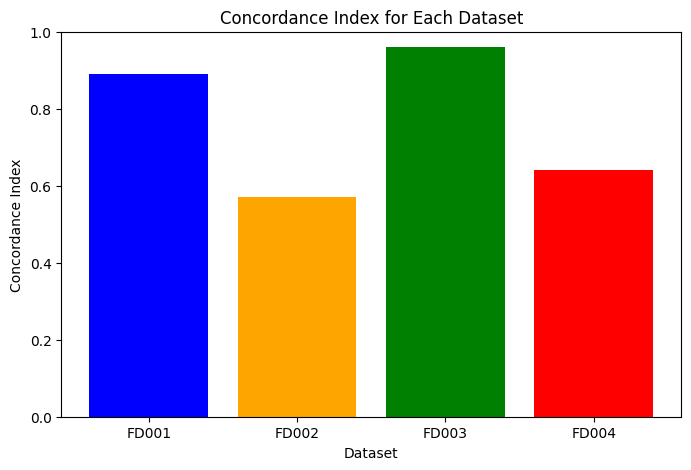

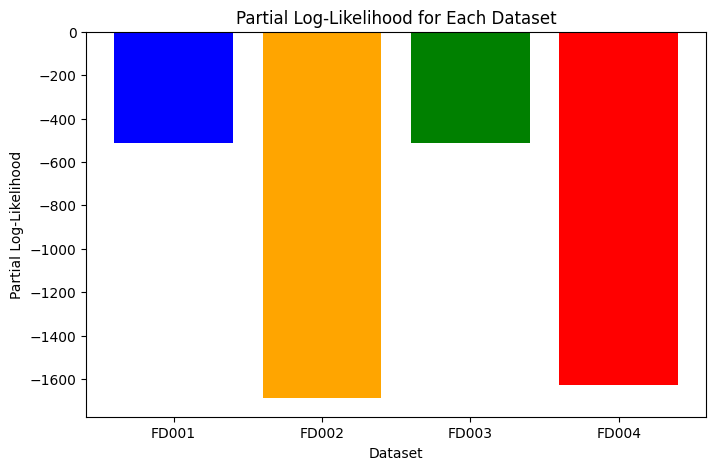

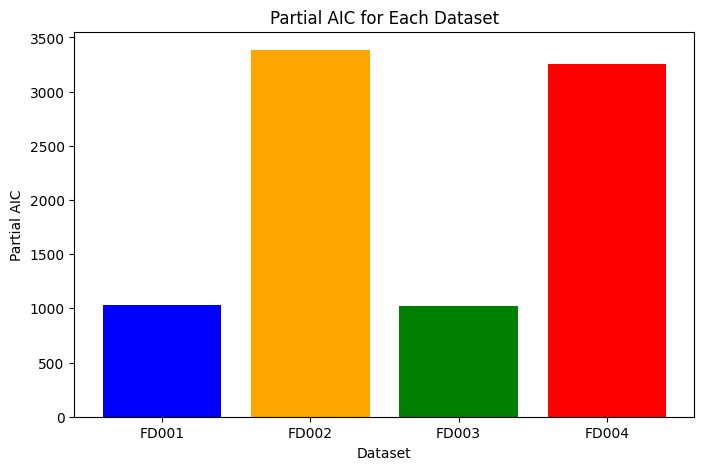

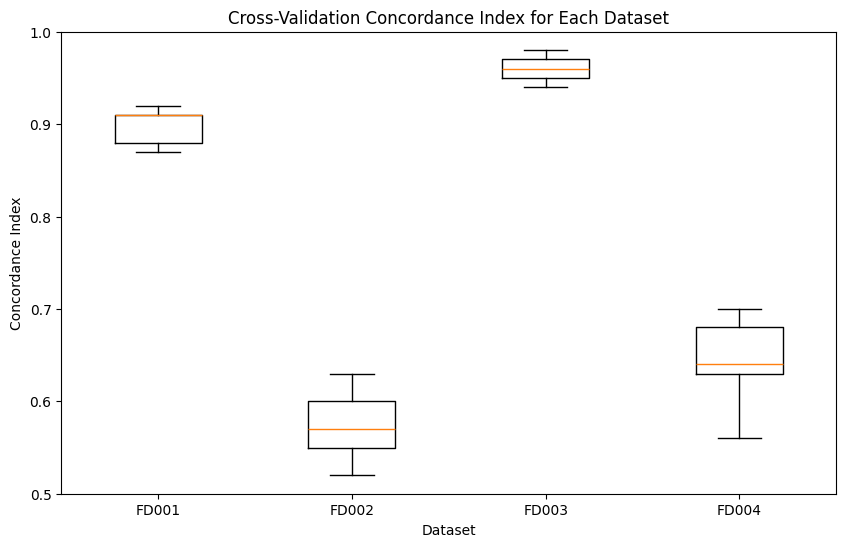

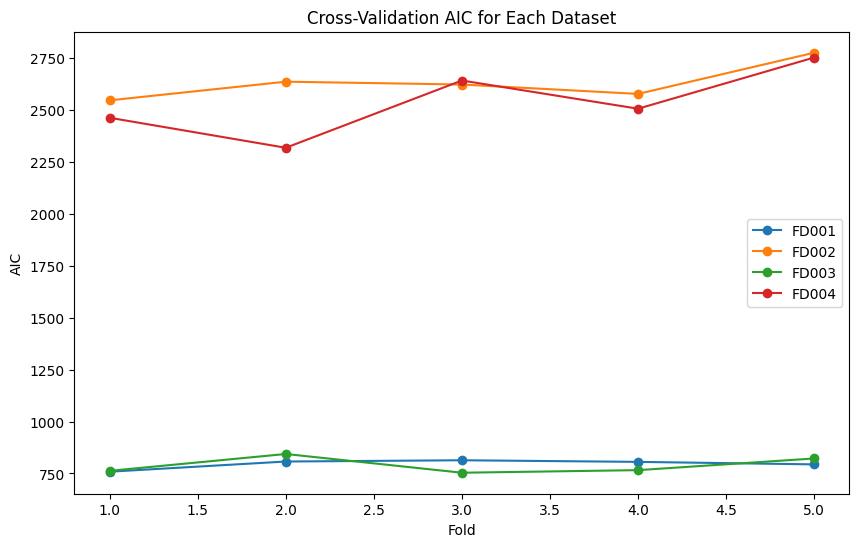

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Concordance Index Bar Plot
datasets_names = ['FD001', 'FD002', 'FD003', 'FD004']
concordance_indices = [0.89, 0.57, 0.96, 0.64]  # Replace with your values

plt.figure(figsize=(8, 5))
plt.bar(datasets_names, concordance_indices, color=['blue', 'orange', 'green', 'red'])
plt.title('Concordance Index for Each Dataset')
plt.xlabel('Dataset')
plt.ylabel('Concordance Index')
plt.ylim([0, 1])
plt.show()

# Partial Log-Likelihood Plot
partial_log_likelihoods = [-513.82, -1689.74, -511.14, -1626.97]  # Replace with your values

plt.figure(figsize=(8, 5))
plt.bar(datasets_names, partial_log_likelihoods, color=['blue', 'orange', 'green', 'red'])
plt.title('Partial Log-Likelihood for Each Dataset')
plt.xlabel('Dataset')
plt.ylabel('Partial Log-Likelihood')
plt.show()

# AIC Bar Plot
aic_values = [1031.63, 3383.47, 1026.29, 3257.94]  # Replace with your values

plt.figure(figsize=(8, 5))
plt.bar(datasets_names, aic_values, color=['blue', 'orange', 'green', 'red'])
plt.title('Partial AIC for Each Dataset')
plt.xlabel('Dataset')
plt.ylabel('Partial AIC')
plt.show()

# Cross-Validation Concordance Index Box Plot
concordance_scores_cv = [
    [0.87, 0.92, 0.88, 0.91, 0.91],  # FD001
    [0.55, 0.60, 0.57, 0.52, 0.63],  # FD002
    [0.97, 0.94, 0.98, 0.95, 0.96],  # FD003
    [0.63, 0.64, 0.68, 0.70, 0.56]   # FD004
]

plt.figure(figsize=(10, 6))
plt.boxplot(concordance_scores_cv, labels=datasets_names)
plt.title('Cross-Validation Concordance Index for Each Dataset')
plt.xlabel('Dataset')
plt.ylabel('Concordance Index')
plt.ylim([0.5, 1])
plt.show()

# Cross-Validation AIC Line Plot
aic_scores_cv = [
    [758.22, 807.25, 813.36, 805.56, 793.48],  # FD001
    [2547.80, 2637.67, 2623.98, 2578.80, 2777.23],  # FD002
    [762.26, 843.54, 753.28, 765.71, 821.98],  # FD003
    [2463.79, 2319.20, 2643.30, 2507.42, 2754.08]  # FD004
]

plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(range(1, 6), aic_scores_cv[i], label=datasets_names[i], marker='o')

plt.title('Cross-Validation AIC for Each Dataset')
plt.xlabel('Fold')
plt.ylabel('AIC')
plt.legend()
plt.show()


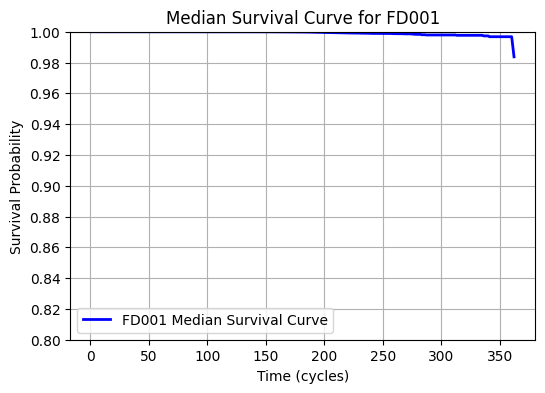

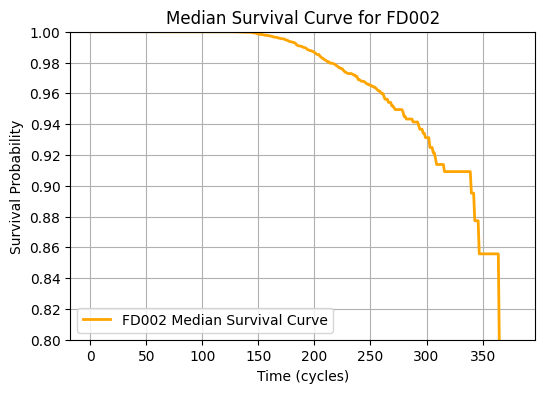

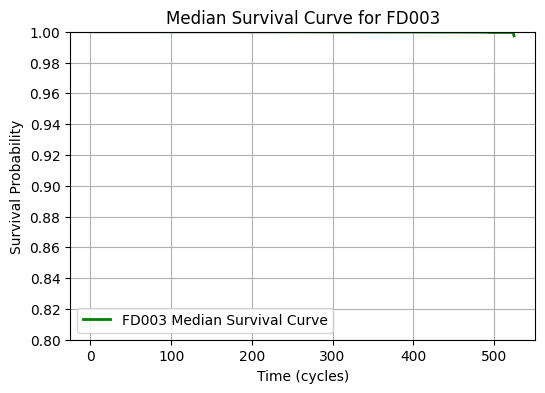

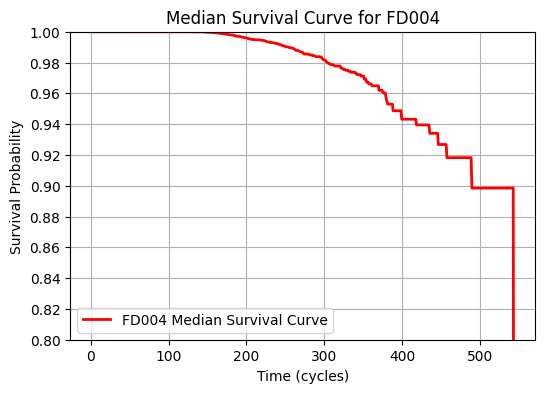

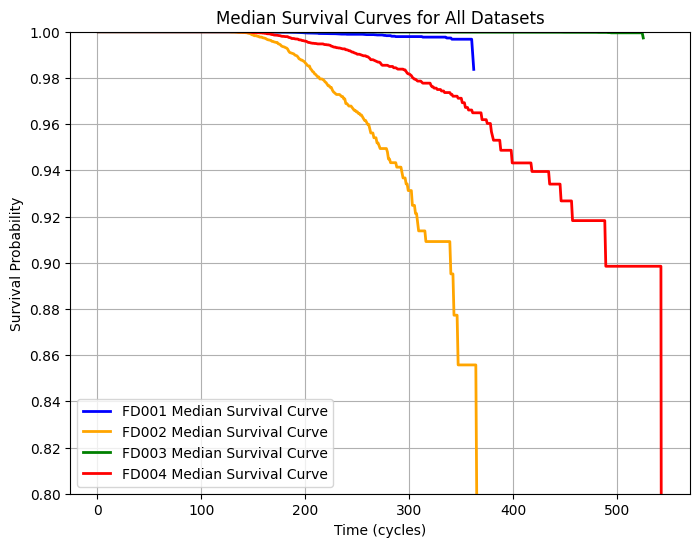

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Colors for each dataset
colors = ['b', 'orange', 'g', 'r']

# First, we generate individual plots for each dataset
for i, cph in enumerate(final_generalized_models):
    plt.figure(figsize=(6, 4))  # Smaller plot size for individual curves

    # Generate the median survival curve for each dataset
    survival_curves = cph.predict_survival_function(generalized_scaled_data[i])
    median_curve = survival_curves.median(axis=1)

    # Plot the median survival curve
    plt.plot(median_curve.index, median_curve, label=f'{datasets[i]} Median Survival Curve', color=colors[i], linewidth=2)

    # Add labels, title, and grid
    plt.title(f'Median Survival Curve for {datasets[i]}')
    plt.xlabel('Time (cycles)')
    plt.ylabel('Survival Probability')
    plt.ylim(0.8, 1.0)  # Focus y-axis on 0.8 to 1.0 range
    plt.yticks(np.arange(0.8, 1.01, 0.02))  # More detailed y-axis ticks

    plt.grid(True)
    plt.legend(loc='lower left')  # Move legend to lower left corner

    # Show individual plot
    plt.show()

# Now we create a combined plot for all datasets
plt.figure(figsize=(8, 6))  # Larger plot for combined curves

for i, cph in enumerate(final_generalized_models):
    # Generate the median survival curve for each dataset
    survival_curves = cph.predict_survival_function(generalized_scaled_data[i])
    median_curve = survival_curves.median(axis=1)

    # Plot all median survival curves on the same plot
    plt.plot(median_curve.index, median_curve, label=f'{datasets[i]} Median Survival Curve', color=colors[i], linewidth=2)

# Add labels and grid for the combined plot
plt.title('Median Survival Curves for All Datasets')
plt.xlabel('Time (cycles)')
plt.ylabel('Survival Probability')

# Adjust y-axis to focus on the detailed range
plt.ylim(0.8, 1.0)  # Focus on the range between 0.8 and 1.0 for better illustration

# Increase number of ticks on y-axis for better detail
plt.yticks(np.arange(0.8, 1.01, 0.02))  # Set y-axis ticks from 0.8 to 1.0 with increments of 0.02

plt.grid(True)
plt.legend(loc='lower left')  # Move legend to lower left corner

# Show the combined plot
plt.show()
